In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import set_printoptions
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,confusion_matrix

from keras.optimizers import SGD
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

import xgboost
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, BatchNormalization
from keras.optimizers import RMSprop

import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('Dataset of Diabetes .csv')

In [4]:
df1.head(3)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N


In [4]:
df1.shape

(1000, 14)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
print(df1['Gender'].value_counts())
print(df1['CLASS'].value_counts())

M    565
F    434
f      1
Name: Gender, dtype: int64
Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64


# Dealing with Categorical Features

    Since our dataset has an object feature 'Gender', i would be encoding it to a numerical feature and then can care of the one instance misinterpeted by 'f' instead of the upper case 'F' as in Female.

    I will also be taking care of 'CLASS' feature as it is categorical, i would be encoding it to a numerical feature, without the use of a label encoder tho, i will be doing it with just the simple .replace( function

In [7]:
df1.iloc[:,2] = df1['Gender'].replace(('F', 'f', 'M'), (0,0,1))
df1.iloc[:,13] = df1['CLASS'].replace(('N', 'N ', 'P', 'Y', 'Y '), (0, 0, 1, 2, 2))

In [8]:
df1.describe()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


In [9]:
df1.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [10]:
df1.duplicated().sum()

0

In [11]:
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [12]:
f =df1.groupby('CLASS')['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI']


In [13]:
f.mean()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
CLASS,,,,,,,,,,,,,
0,368.252427,815851.990291,0.378641,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
1,396.056604,64299.037736,0.679245,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
2,333.624408,216955.928910,0.580569,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517


In [14]:
cols = ['No_Pation', 'Gender', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'VLDL', 'BMI', 'CLASS']

In [15]:
'''sns.pairplot(df1[cols], hue = 'CLASS', palette='Dark2')'''

"sns.pairplot(df1[cols], hue = 'CLASS', palette='Dark2')"

In [16]:
'''plt.scatter(df1['TG'], df1['BMI'])'''

"plt.scatter(df1['TG'], df1['BMI'])"

<AxesSubplot:xlabel='CLASS', ylabel='count'>

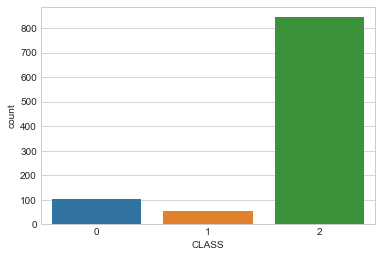

In [26]:
sns.countplot(df1['CLASS'])

In [38]:
for col in df1.columns.to_list():
    f= pd.DataFrame(df1[col].value_counts(normalize= True)*100.0)
    print(pd.DataFrame(f))

      ID
76   0.2
108  0.2
57   0.2
26   0.2
69   0.2
..   ...
353  0.1
356  0.1
488  0.1
508  0.1
248  0.1

[800 rows x 1 columns]
        No_Pation
454316        1.9
856           0.2
87654         0.2
71741         0.2
34290         0.2
...           ...
34342         0.1
3275          0.1
34343         0.1
23973         0.1
24054         0.1

[961 rows x 1 columns]
   Gender
1    56.5
0    43.5
     AGE
55  18.1
60   8.8
54   8.4
51   5.1
61   4.9
56   4.8
52   4.4
50   4.3
59   3.2
57   3.1
58   3.0
63   2.9
53   2.5
30   2.0
49   1.9
45   1.6
33   1.6
40   1.3
44   1.3
35   1.1
66   1.1
47   1.0
42   1.0
48   1.0
31   0.9
39   0.9
68   0.8
62   0.8
73   0.8
43   0.8
64   0.7
69   0.6
67   0.6
38   0.6
41   0.5
34   0.5
36   0.4
76   0.4
77   0.4
28   0.3
46   0.3
26   0.2
70   0.2
65   0.2
75   0.2
25   0.1
79   0.1
32   0.1
20   0.1
71   0.1
        Urea
4.300    4.0
4.000    3.7
5.000    3.6
4.800    3.4
4.100    3.3
...      ...
13.300   0.1
13.500   0.1
6.833    0.1
0.500    

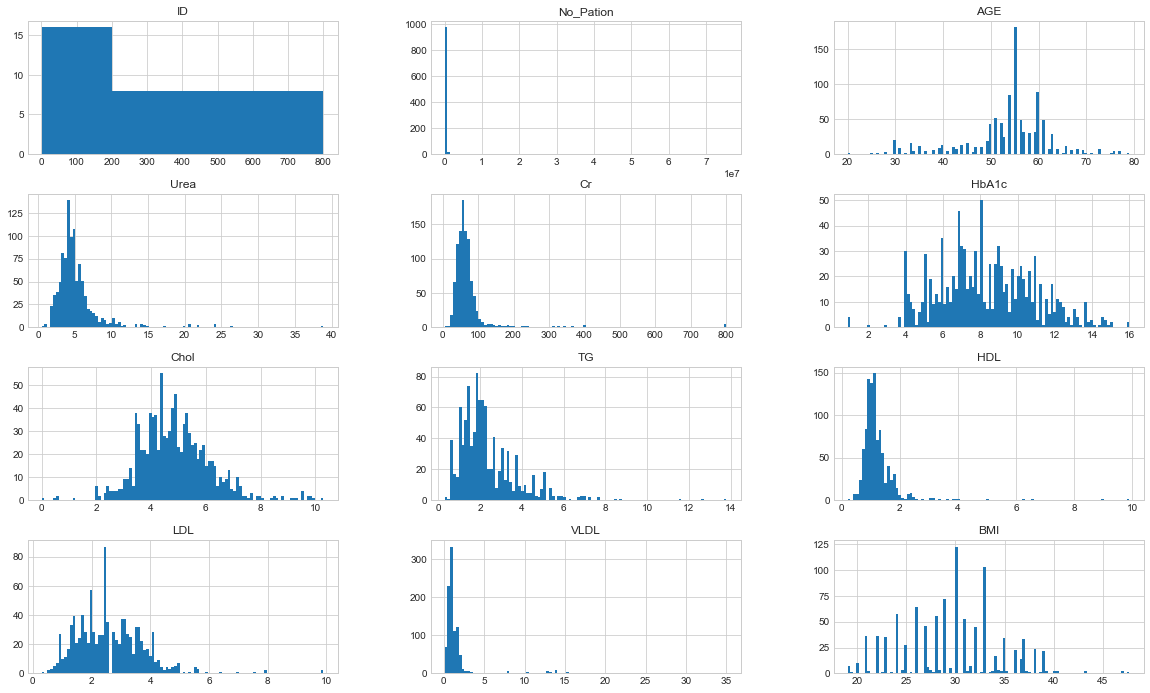

In [21]:
df1.hist(bins = 100, figsize=(20,12))
plt.show()

## To check the Distribution of each feature we use the density plot

In [17]:
'''for col in df1.columns.to_list():
    df1[col].plot(kind= 'density')
    plt.title(col)
    plt.show()'''

"for col in df1.columns.to_list():\n    df1[col].plot(kind= 'density')\n    plt.title(col)\n    plt.show()"

### #comment

### Ploting a catplot to see the behaviour of each feature

In [18]:
"""for col in df1.columns.to_list():
    sns.catplot(data= df1, x=col, kind = 'count', legend = True , palette ='Dark2', height =7)
    plt.show()"""

"for col in df1.columns.to_list():\n    sns.catplot(data= df1, x=col, kind = 'count', legend = True , palette ='Dark2', height =7)\n    plt.show()"

In [19]:
""""df1.hist(bins=50, figsize=(20,12))
    plt.title(col)
    plt.show()"""

'"df1.hist(bins=50, figsize=(20,12))\n    plt.title(col)\n    plt.show()'

In [20]:
'''for col in df1.columns.to_list():
    fig1 = sns.FacetGrid(df1 ,hue = 'CLASS', aspect = 5)
    fig1.map(sns.kdeplot, col, shade = True)
    oldest = df1[col].max()
    fig1.set(xlim=(0,oldest))
    fig1.add_legend()'''

"for col in df1.columns.to_list():\n    fig1 = sns.FacetGrid(df1 ,hue = 'CLASS', aspect = 5)\n    fig1.map(sns.kdeplot, col, shade = True)\n    oldest = df1[col].max()\n    fig1.set(xlim=(0,oldest))\n    fig1.add_legend()"

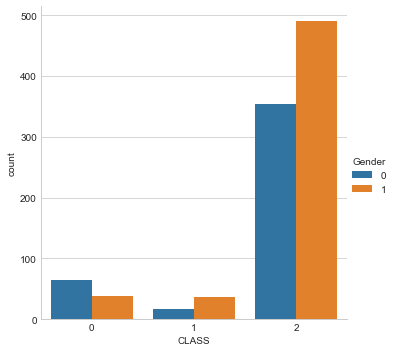

In [21]:
'''sns.catplot('CLASS',data= df1,hue='Gender',kind = "count")'''